# Servicio Profesional ug
## Determinación de abundancias quimicas en la galaxia NGC7469
### Oscar De la Cruz Echeveste 

In [1]:
#librerias a usar 
import matplotlib. pyplot as plt
import numpy as np
import math
from scipy import stats
#import seaborn; seaborn.set()

In [2]:
#Cargo datos para trabajar:
OIII = np.loadtxt('OSCARHbOIII49595007-55.dat')
OI = np.loadtxt('OSCAROI6300-55.dat')
NII = np.loadtxt('OSCARHaNII65486584-55.dat')
SII = np.loadtxt('OSCARSII67176731-55.dat')

In [3]:
H_beta_flx = OIII[:,3]
e_H_beta_flx = OIII[:,4]
OIII_4959_flx = OIII[:,7]
e_OIII_4959_flx = OIII[:,8]
OIII_5007_flx = OIII[:,11]
e_OIII_5007_flx = OIII[:,12]
OI_6300_flx = OI[:,3]
H_alpha_flx = NII[:,3]
e_H_alpha_flx = NII[:,4]
NII_6548_flx = NII[:,7]
e_NII_6548_flx = NII[:,8]
NII_6584_flx = NII[:,11]
e_NII_6584_flx = NII[:,12]
SII_6717_flx = SII[:,3]
e_SII_6717_flx = SII[:,4]
SII_6731_flx = SII[:,7]
e_SII_6731_flx = SII[:,8]

In [4]:
log_O3Hb = np.log10(np.divide(OIII_5007_flx,H_beta_flx))
log_O1Ha = np.log10(np.divide(OI_6300_flx,H_alpha_flx))
log_N2Ha = np.log10(np.divide(NII_6584_flx,H_alpha_flx))
log_S2Ha = np.log10(np.divide(SII_6717_flx+SII_6731_flx,H_alpha_flx))

\begin{equation}
    O3N2 = log \left( \frac{[OIII]\lambda 5007}{H\beta} \times \frac{H\alpha}{[NII]\lambda 6584 } \right)
\end{equation}

In [5]:
O3N2 = log_O3Hb - log_N2Ha

In [6]:
l_HO_O3N2 = 8.533 - 0.214*O3N2
#l_HO_O3N2 = 8.505 - 0.221*O3N2

In [7]:
err_O3N2 = ((1/abs(math.log1p(10)))*( 
            (e_OIII_5007_flx/np.abs(OIII_5007_flx))+
            (e_NII_6584_flx/np.abs(NII_6584_flx))+
            (e_H_beta_flx/np.abs(H_beta_flx))+
            (e_H_alpha_flx/np.abs(H_alpha_flx))))

err_l_HO_O3N2 = 0.214*err_O3N2

In [8]:
N2 = log_N2Ha

In [9]:
R_3 = np.divide(OIII_4959_flx+OIII_5007_flx,H_beta_flx)
N_2 = np.divide(NII_6548_flx+NII_6584_flx,H_beta_flx)
S_2 = np.divide(SII_6717_flx + SII_6731_flx,H_beta_flx)

In [10]:
err_R_3 = (e_OIII_5007_flx*np.abs(np.divide(OIII_4959_flx+1,H_beta_flx)) + 
           e_OIII_4959_flx*np.abs(np.divide(1+OIII_5007_flx,H_beta_flx)) + 
           e_H_beta_flx*np.abs(np.divide(-OIII_4959_flx-OIII_5007_flx,H_beta_flx**2)) )
err_N_2 = (e_NII_6548_flx*np.abs(np.divide(1+NII_6584_flx,H_beta_flx))+
           e_NII_6584_flx*np.abs(np.divide(NII_6548_flx+1,H_beta_flx))+
           e_H_beta_flx*np.abs(np.divide(-NII_6548_flx-NII_6584_flx,H_beta_flx**2)) )
err_S_2 = (e_SII_6717_flx*np.abs(np.divide(1 + SII_6731_flx,H_beta_flx)) + 
           e_SII_6731_flx*np.abs( np.divide(SII_6717_flx + 1,H_beta_flx)) +
           e_H_beta_flx*np.abs( np.divide(-SII_6717_flx - SII_6731_flx,H_beta_flx**2)) )

### The NS Calibration:

Calibration for determination of oxygen and nitrogen abundances andelectron temperature in Hiiregions where the [Oii]λ3727+λ3729 line (R2) is not available et. al Pilyugin (2010). The calibration is based on the strong emission lines of O++, N+, and S+ (NS calibration)and derived using the spectra of Hiiregions with measured electron temperatures as calibra-tion datapoints.The NS calibration provides reliable oxygen and nitrogen abundances for Hiiregions over thewhole range of metallicities

In [11]:
#calibración:
Z_O = np.zeros(np.shape(R_3))
Z_N = np.zeros(np.shape(R_3))
err_Z_N = np.zeros(np.shape(R_3))

for i in range(len(R_3)):
    if np.log10(N_2[i])>-0.1:
        Z_O[i] = 8.454-0.216*np.log10(R_3[i])-0.362*np.log10(S_2[i])-0.101*np.log10(N_2[i]/S_2[i])
        Z_N[i] = 7.414-0.383*np.log10(R_3[i])+0.119*np.log10(S_2[i])+0.988*np.log10(N_2[i]/S_2[i])
        err_Z_N[i] = ((1/abs(np.log1p(10)))*(err_R_3[i]*np.abs(0.383/R_3[i]) + 
                                          err_S_2[i]*np.abs((0.119+0.988)/S_2[i]) + 
                                          err_N_2[i]*np.abs((0.988)/N_2[i])
                                         ))
                   
    if np.log10(N_2[i])<-0.1 and np.log10(N_2[i]/S_2[i])>-0.25:
        Z_O[i] = 8.456+0.082*np.log10(R_3[i])+0.391*np.log10(N_2[i])+0.290*np.log10(N_2[i]/S_2[i])
        Z_N[i] = 7.250+0.078*np.log10(R_3[i])+0.529*np.log10(N_2[i])+0.906*np.log10(N_2[i]/S_2[i])
        err_Z_N[i] = ((1/abs(np.log1p(10)))*(err_R_3[i]*np.abs(0.078/R_3[i]) + 
                                          err_S_2[i]*np.abs((0.906)/S_2[i]) + 
                                          err_N_2[i]*np.abs((0.529+0.906)/N_2[i])
                                         ))
    if np.log10(N_2[i])<-0.1 and np.log10(N_2[i]/S_2[i])<-0.25:
        Z_O[i] = 7.881+0.929*np.log10(R_3[i])+0.650*np.log10(N_2[i])+0.025*np.log10(N_2[i]/S_2[i])
        Z_N[i] = 6.599+0.888*np.log10(R_3[i])+0.663*np.log10(N_2[i])+0.371*np.log10(N_2[i]/S_2[i])
        err_Z_N[i] = ((1/abs(np.log1p(10)))*(err_R_3[i]*np.abs(0.888/R_3[i]) + 
                                          err_S_2[i]*np.abs((0.371)/S_2[i]) + 
                                          err_N_2[i]*np.abs((0.663+0.371)/N_2[i])
                                         ))

In [12]:
n = 47

imagen_OH = np.zeros((n, n)) + 7.881 #+ 7.59
err_imagen_OH  = np.zeros((n, n))
imagen_NH = np.zeros((n, n)) + 6.599 #+ 7.08
err_imagen_NH  = np.zeros((n, n))
y_sfg_im = np.zeros(np.shape(log_O3Hb))

for i in range(n):
    for j in range(n):
        y_sfg_im[n*i+j] = np.divide(0.61,log_N2Ha[n*i+j]-0.47)+1.19
        if log_O3Hb[n*i+j] <= y_sfg_im[n*i+j] and log_N2Ha[n*i+j] <= 0.0:
            imagen_OH[i][j] = l_HO_O3N2[n*i+j] 
            #imagen_OH[i][j] = Z_O[n*i+j]
            err_imagen_OH[i][j] = err_l_HO_O3N2[n*i+j]
            imagen_NH[i][j] = Z_N[n*i+j]
            err_imagen_NH[i][j] = err_Z_N[n*i+j]
        else:
            imagen_OH[i][j] = np.min(l_HO_O3N2)
            err_imagen_OH[i][j] = np.min(err_O3N2)
            #imagen_OH[i][j] = np.min(Z_O)
            imagen_NH[i][j] = np.min(Z_N)
            err_imagen_NH[i][j] = np.min(err_Z_N)

In [13]:
def imag(x,y,t,cmap):
    plt.figure()
    plt.imshow(x,origin='lower',cmap=cmap)
    plt.ylabel('Y - spaxel',fontsize = 16)
    plt.xlabel('X - spaxel',fontsize = 16)
    plt.title(y,fontsize = 16)
    plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
    cax=plt.colorbar()
    cax.set_label(t,labelpad = 15,fontsize = 15)
    line_colour1 = ('royalblue', 'blue', 'mediumblue', 'darkblue')
    plt.plot()

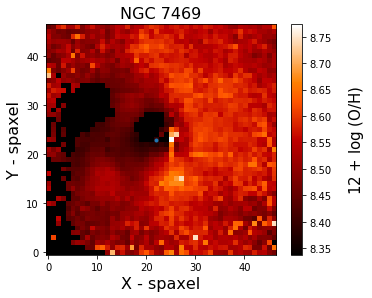

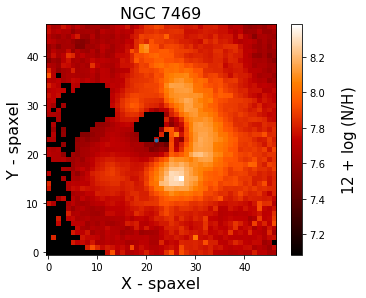

In [14]:
x = 38-16
y = 27-4
imag(imagen_OH,'NGC 7469','12 + $\log$ (O/H)',cmap=plt.cm.gist_heat)
plt.plot(x,y,'.')
plt.savefig("OH_star_formation.jpg")
imag(imagen_NH,'NGC 7469','12 + $\log$ (N/H)',cmap=plt.cm.gist_heat)
plt.plot(x,y,'.')
plt.savefig("ON_star_formation.jpg");

In [15]:
def lin_fit(x,y): 
    
    gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    mn=np.min(x)-1
    mx=np.max(x)+1
    x1 = np.linspace(mn,mx,500)
    y1 = gradient*x1 + intercept
    
    return [x1, y1, gradient, intercept, r_value, p_value, std_err]

In [16]:
### centro x=27-15, y=38-15
dis_OH = np.zeros(n*n)
g_OH = []
err_g_OH = []
for i in range(n):
    for j in range(n):
        dis_OH[n*i+j] = math.sqrt((x-i)**2 + (y-j)**2)
        dis_OH[n*i+j] = dis_OH[n*i+j]*64
        g_OH.append(imagen_OH[:][::-1][i][j])  
        err_g_OH.append(err_imagen_OH[:][::-1][i][j])

dis_NH = np.zeros(n*n)
g_NH = []
err_g_NH = []
for i in range(n):
    for j in range(n):
        dis_NH[n*i+j] = math.sqrt((x-i)**2 + (y-j)**2)
        dis_NH[n*i+j] = dis_NH[n*i+j]*64    
        g_NH.append(imagen_NH[:][::-1][i][j])
        err_g_NH.append(err_imagen_NH[:][::-1][i][j])

In [17]:
g_OH = np.array(g_OH)
err_g_OH = np.array(err_g_OH)
g_NH = np.array(g_NH)
err_g_NH = np.array(err_g_NH)

In [18]:
dis_OH_new = dis_OH[np.where(g_OH != np.min(l_HO_O3N2))]
g_OH_new = g_OH[np.where(g_OH != np.min(l_HO_O3N2))]
err_g_OH_new = err_g_OH[np.where(g_OH != np.min(l_HO_O3N2))]
#dis_OH_new = dis_OH[np.where(g_OH != np.min(Z_O))]
#g_OH_new = g_OH[np.where(g_OH != np.min(Z_O))]
dis_NH_new = dis_NH[np.where(g_NH != np.min(Z_N))]
g_NH_new = g_NH[np.where(g_NH != np.min(Z_N))]
err_g_NH_new = err_g_OH[np.where(g_NH != np.min(Z_N))]

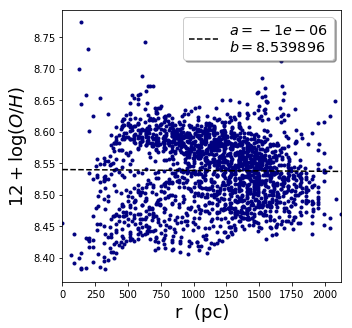

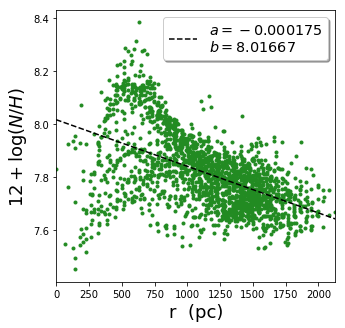

In [70]:
fit_HO = lin_fit(dis_OH_new,g_OH_new)
fit_NO = lin_fit(dis_NH_new,g_NH_new)

plt.figure(figsize=(5,5))
plt.plot(dis_OH_new ,g_OH_new,'.', color= 'navy')
plt.plot(fit_HO[0],fit_HO[1],'--k',label='$a={0}$\n$b = {1}$'.format(round(fit_HO[2],6),round(fit_HO[3],6)))
plt.xlabel('r  (pc)',fontsize = 18)
plt.ylabel('$12 + \log(O/H)$',fontsize = 18)
plt.xlim(np.min(dis_OH)-0.2,np.max(dis_OH)+0.2)
plt.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.savefig("ajuste_gradinte_OH.jpg")

plt.figure(figsize=(5,5))
plt.plot(dis_NH_new ,g_NH_new,'.', color= 'forestgreen')
plt.plot(fit_NO[0],fit_NO[1],'--k',label='$a={0}$\n$b = {1}$'.format(round(fit_NO[2],6),round(fit_NO[3],6)))
plt.xlabel('r  (pc)',fontsize = 18)
plt.ylabel('$12 + \log(N/H)$',fontsize = 18)
plt.xlim(np.min(dis_NH)-0.2,np.max(dis_NH)+0.2)
plt.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.savefig("ajuste_gradinte_NH.jpg")

In [19]:
def fit_2(x,y,bins_i,err):
    if bins_i <= (np.max(x)-np.min(x))/2:
        bins = bins_i
        x_m = []
        y_m = []
        err_m = []
        des = []
        while bins <= np.max(x):
            x_m.append(np.mean(x[(x<=bins)&(x >= bins - bins_i)]))
            y_m.append(np.mean(y[(x<=bins)&(x >= bins - bins_i)]))
            err_m.append(np.mean(err[(x<=bins)&(x >= bins - bins_i)]))
            des.append(np.std(y[(x<=bins)&(x >= bins - bins_i)]))
            bins = bins + bins_i 
        err_m = np.array(err_m)
        des = np.array(des)
        return x_m,y_m,np.sqrt(err_m**2 + des**2)
    else:
        print('Escoja un bin menor a:', (np.max(x)-np.min(x))/2)
        
    

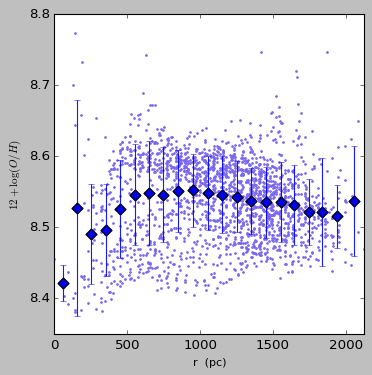

In [173]:
fit_HO_2 = fit_2(dis_OH_new,g_OH_new,100,err_g_OH_new)
fit_NO_2 = fit_2(dis_NH_new,g_NH_new,100,err_g_NH_new)

plt.style.use('classic')

plt.figure(figsize=(5,5))
plt.errorbar(fit_HO_2[0],fit_HO_2[1], yerr=fit_HO_2[2], c='blue' ,alpha=0.9, fmt="D")
plt.scatter(dis_OH_new ,g_OH_new,s=2, color= 'mediumslateblue')
plt.scatter(fit_HO_2[0],fit_HO_2[1],s=50,marker='D',color= 'black')
plt.xlabel('r  (pc)',fontsize = 10)
plt.ylabel('$12 + \log(O/H)$',fontsize = 10)
plt.xlim(np.min(dis_OH)-0.2,np.max(dis_OH)+0.2)
#plt.legend(loc='upper right', shadow=True, fontsize='x-large')
#plt.savefig("ajuste_gradinte_OH.jpg")

plt.figure(figsize=(8,8))
plt.scatter(dis_NH_new ,g_NH_new,s=10, color= 'mediumseagreen')
plt.errorbar(fit_NO_2[0],fit_NO_2[1], yerr=fit_NO_2[2], c='black' ,alpha=0.9, fmt="D",elinewidth=2)
plt.xlabel('r  (pc)',fontsize = 18)
plt.ylabel('$12 + \log(N/H)$',fontsize = 18)
plt.xlim(np.min(dis_NH)-0.2,np.max(dis_NH)+0.2)
plt.title('Gradiente de [N/H]',fontsize = 18)
plt.savefig("ajuste_gradinte_NH.jpg")

In [20]:
from astropy.io import fits
from astropy.wcs import WCS
from astropy.utils.data import get_pkg_data_filename
from PIL import Image

filename = get_pkg_data_filename('NGC7469Corr.fits')
hdu = fits.open(filename)[0]
mywcs = WCS(hdu.header)

 [astropy.io.fits.verify]


In [21]:
plt.rcParams['image.cmap'] = 'gist_heat'

/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


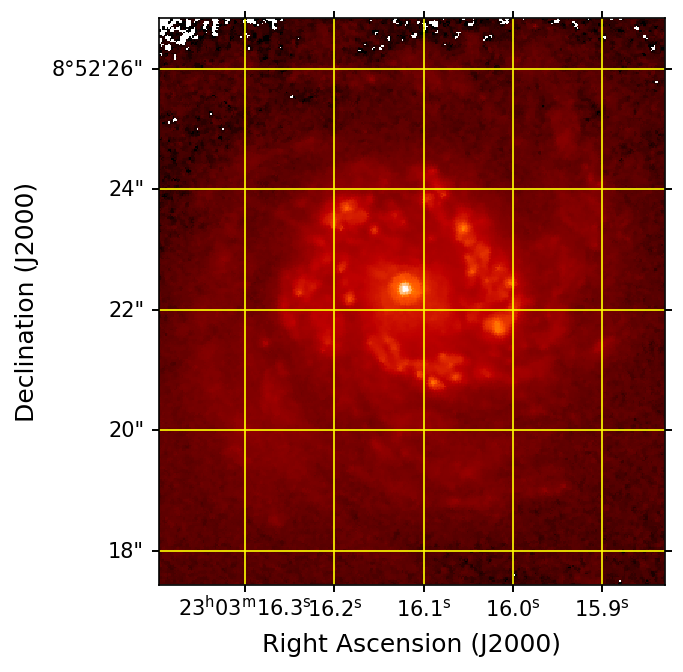

In [22]:
plt.figure(figsize=(5,5), dpi=150)
plt.subplot(projection=mywcs)
plt.imshow(np.log10(hdu.data[158:534,304:640]))
plt.grid(color='yellow', ls='solid')
plt.xlabel('Right Ascension (J2000)', fontsize=12)
plt.ylabel('Declination (J2000)', fontsize=12)

In [23]:
# adjust width and height to your needs
width = int(336)
height = int(376)

imgOH_SF = Image.fromarray(imagen_OH)
imgNH_SF = Image.fromarray(imagen_NH)

im4_OH_SF = imgOH_SF.resize((width, height), Image.ANTIALIAS)
im4_NH_SF = imgNH_SF.resize((width, height), Image.ANTIALIAS)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.


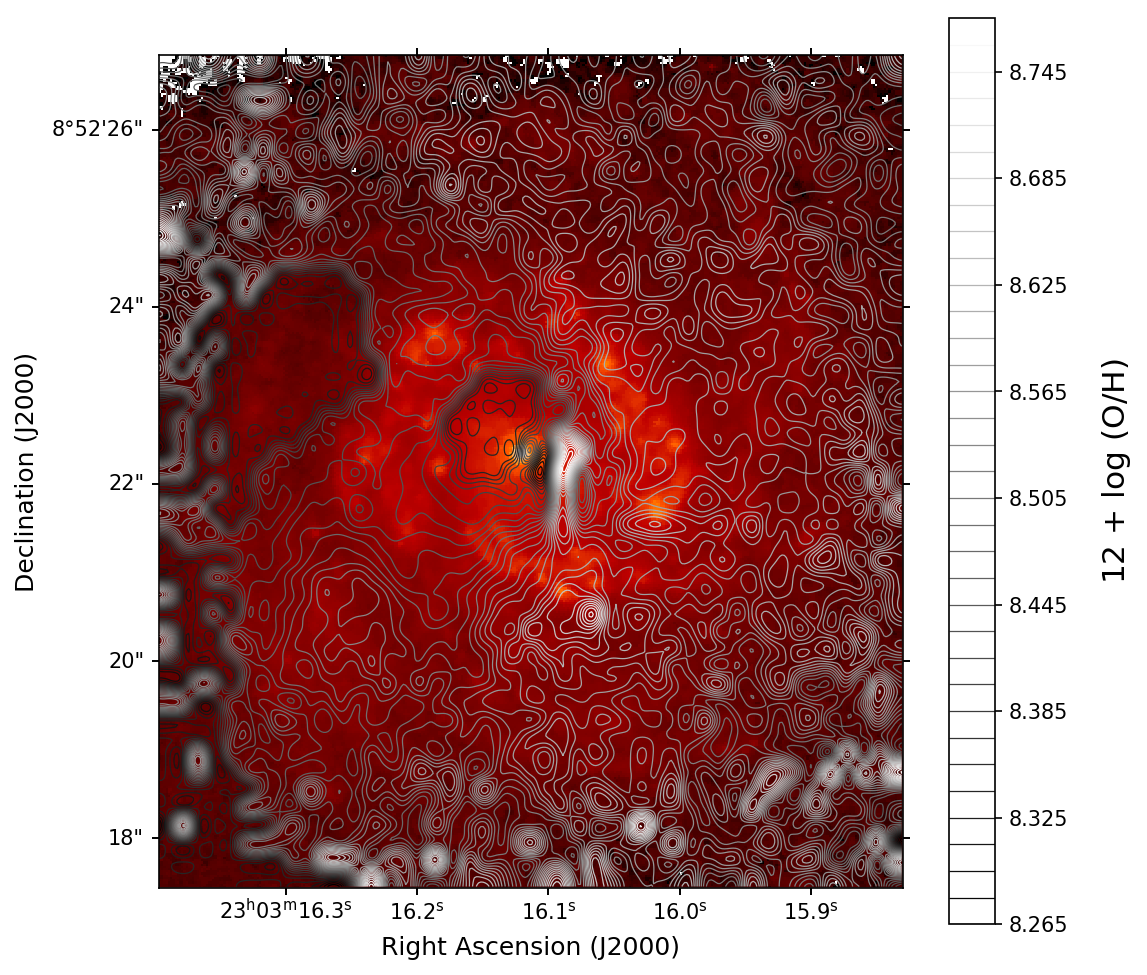

In [52]:
plt.figure(figsize=(8,8), dpi=150)
#plt.subplot(1,2,1)
plt.subplot(projection=mywcs)
plt.imshow(np.log10(hdu.data[158:534,304:640]))
#plt.grid(color='yellow', ls='solid')
plt.contour(im4_OH_SF,40,cmap=plt.cm.gray,linewidths=0.6)
#plt.title("[O/H] Star fromation")
plt.xlabel('Right Ascension (J2000)', fontsize=12)
plt.ylabel('Declination (J2000)', fontsize=12)
cax=plt.colorbar()
cax.set_label('12 + $\log$ (O/H)',labelpad = 15,fontsize = 15)
plt.plot()
plt.savefig("OH_star_formation.jpg")

/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.


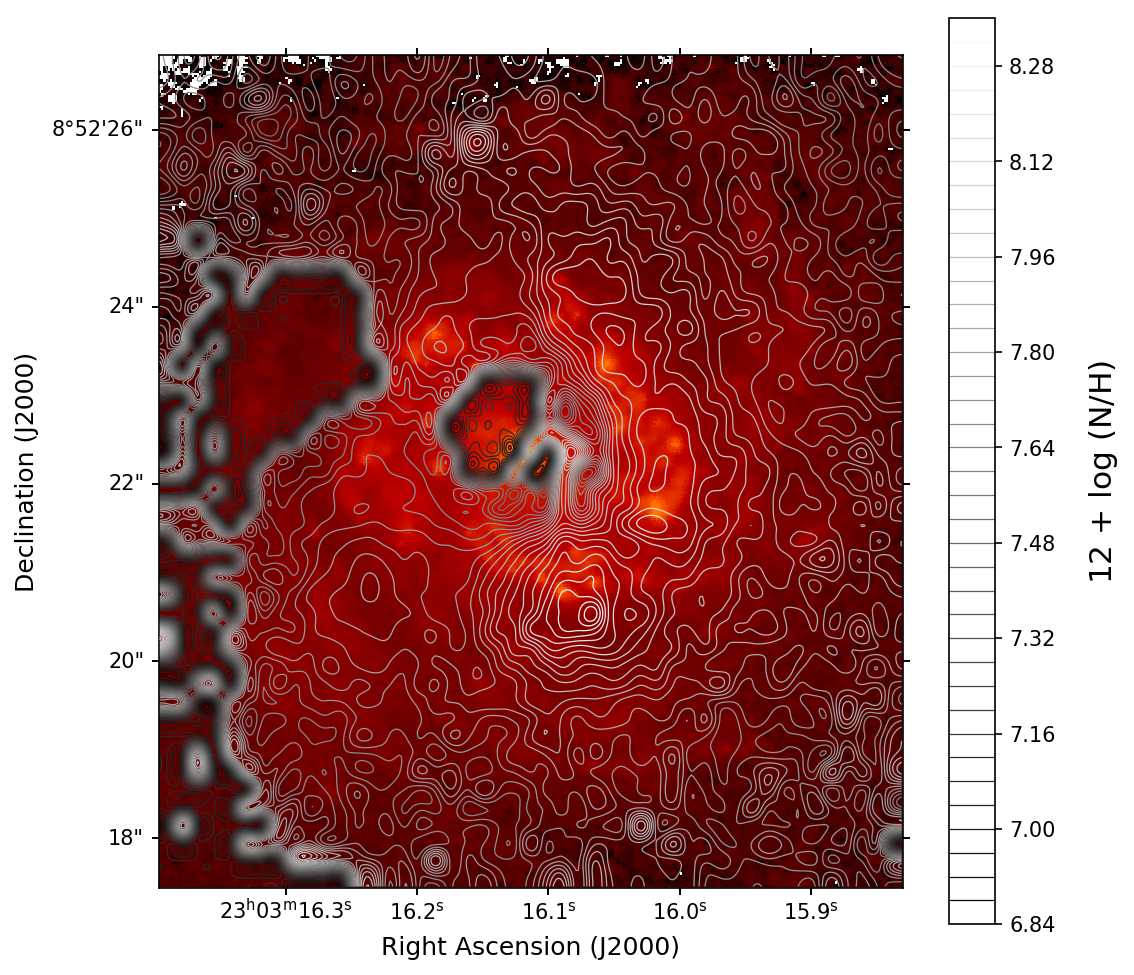

In [55]:
plt.figure(figsize=(8,8), dpi=150)
#plt.subplot(1,2,2)
plt.subplot(projection=mywcs)
plt.imshow(np.log10(hdu.data[158:534,304:640]))
#plt.grid(color='yellow', ls='solid')
plt.contour(im4_NH_SF,40,cmap=plt.cm.gray,linewidths=0.6)
#plt.title("[N/H] Star fromation")
plt.xlabel('Right Ascension (J2000)', fontsize=12)
plt.ylabel('Declination (J2000)', fontsize=12)
cax=plt.colorbar()
cax.set_label('12 + $\log$ (N/H)',labelpad = 15,fontsize = 15)
plt.plot()
plt.savefig("ON_star_formation.jpg")

In [44]:
imagen_OH_2 = np.zeros((n, n)) + 8.66 #7.5 
imagen_NH_2 = np.zeros((n, n)) + 8.66#7.08
y_sfg_im = np.zeros(np.shape(log_O3Hb))

for i in range(n):
    for j in range(n):
        y_sfg_im[n*i+j] = np.divide(0.61,log_N2Ha[n*i+j]-0.47)+1.19
        if log_O3Hb[n*i+j] <= y_sfg_im[n*i+j] and log_N2Ha[n*i+j] <= 0.0:
            imagen_OH_2[i][j] = imagen_OH[i][j]
        else:
            imagen_OH_2[i][j] = - 0.52 + np.power(log_N2Ha[n*i+j]-0.6,2) + 8.61#+ imagen_OH_2[i][j]

In [45]:
imag(imagen_OH_2,'NGC 7469','12 + $\log$ (O/H)',cmap=plt.cm.gist_heat)
plt.plot(38-16,27-4,'oy')

In [46]:
# adjust width and height to your needs
width = int(336)
height = int(376)

imgOH_AGN = Image.fromarray(imagen_OH_2)

im4_AGN = imgOH_AGN.resize((width, height), Image.ANTIALIAS)

In [50]:
plt.figure(figsize=(8,8), dpi=200)
plt.subplot(projection = mywcs)
plt.imshow(np.log10(hdu.data[158:534,304:640]))
plt.contour(im4_AGN,40,cmap=plt.cm.seismic, linewidths=0.6)
cax=plt.colorbar()
cax.set_label('12 + $\log$ (O/H)',labelpad = 15,fontsize = 15)
#plt.title("[O/H] Star fromation and AGN",fontsize=18)
plt.xlabel('Right Ascension (J2000)', fontsize=12)
plt.ylabel('Declination (J2000)', fontsize=12)
plt.savefig("OH_agn_region.jpg")

/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


In [83]:
def lin_fit(x,y): 
    
    gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    mn=np.min(x)-1
    mx=np.max(x)+1
    x1 = np.linspace(mn,mx,500)
    y1 = gradient*x1 + intercept
    
    return [x1, y1, gradient, intercept, r_value, p_value, std_err]


In [84]:
### centro x=27-15, y=38-15
x = 38-16
y = 27-4
dis_2 = np.zeros(n*n)
g_OH_2 = []
for i in range(n):
    for j in range(n):
        dis_2[n*i+j] = math.sqrt((x-i)**2 + (y-j)**2)
        dis_2[n*i+j] = dis_2[n*i+j]*64
        g_OH_2.append(imagen_OH_2[:][::-1][i][j])


In [85]:
g_OH_2 = np.array(g_OH_2)

In [174]:
plt.style.use('classic')

plt.figure(figsize=(8,8))
plt.scatter(dis_2 ,g_OH_2,s =18,color='blue')
plt.scatter(dis_OH_new ,g_OH_new,s=5, color= 'lightblue')
plt.errorbar(fit_HO_2[0],fit_HO_2[1], yerr=fit_HO_2[2],c='black' ,alpha=1, fmt="D",elinewidth=3)
plt.scatter(fit_HO_2[0],fit_HO_2[1],s=80,marker='D',color= 'lightblue')


plt.xlabel('r  (pc)',fontsize = 15)
plt.ylabel('$12 + \log(O/H)$',fontsize = 15)
plt.title('Gradiente de [O/H]',fontsize = 18)
#plt.xlim(np.min(dis)-0.2,np.max(dis)+0.2)
plt.xlim(-100,2200)
#plt.ylim(8.1,8.8)
#plt.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.savefig("ajuste_gradinte_OH.jpg")